# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [113]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality

import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import numpy as np
import pandas as pd
import scipy.stats.stats as stats
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [114]:
# (1) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')
auto_numeric.describe()


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


(2) ***Your answer goes here:***
   The dataset contains 159 rows. From the summary, Some attributes have larger data fluctuations,such as enginer-powe and peak-rpm. And some attributes have smaller fluctuations,such as width and height. The min of engine-size is 3.39 and the max is 174.16. So it has a large range of values.

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the (pairwise) distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

normalized-losses	0.01536764742365821


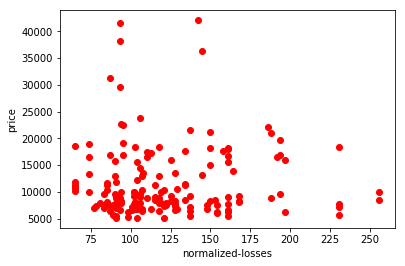

wheel-base	0.4235105951503859


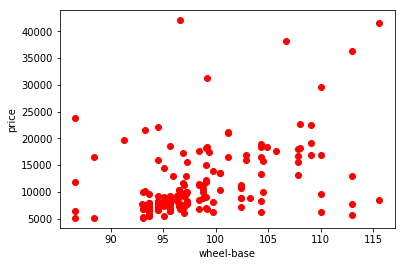

length	0.5128830452653907


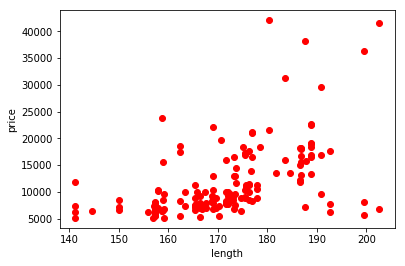

width	0.5243255521274498


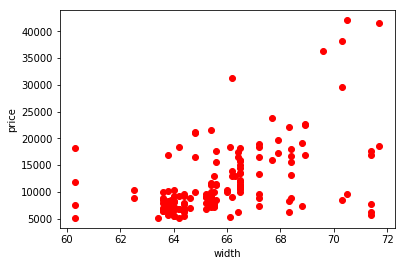

height	0.13956255898680384


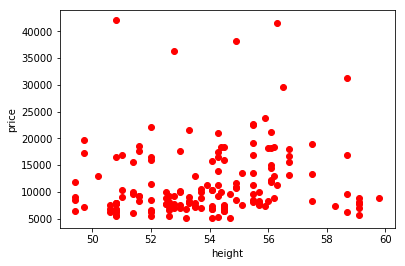

engine-size	0.7151245901914791


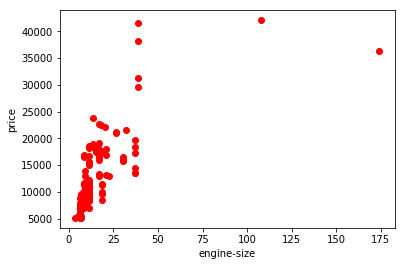

bore	0.3652072892128545


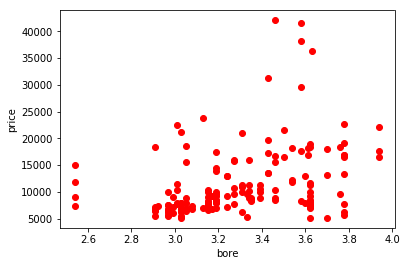

stroke	0.12783403193265092


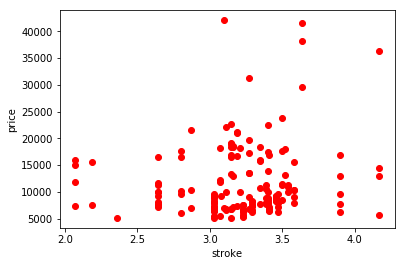

compression-ratio	0.12568322167466559


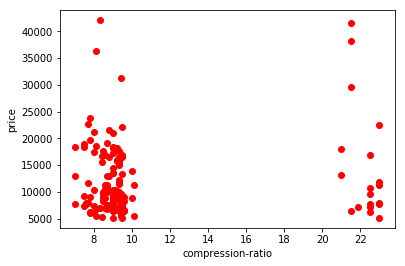

engine-power	0.4439685914631636


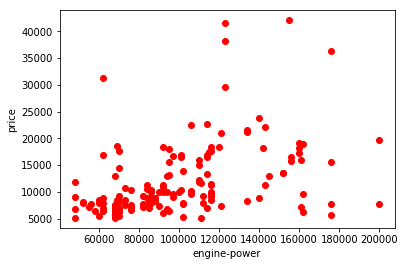

peak-rpm	-0.09934529106318549


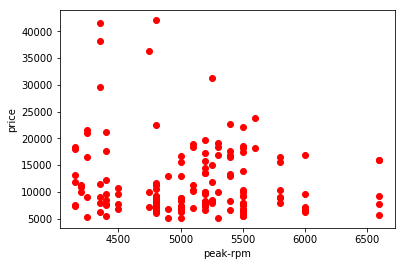

city-mpg	-0.35678950067247045


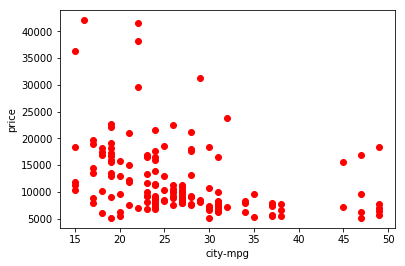

highway-mpg	-0.43846743171443286


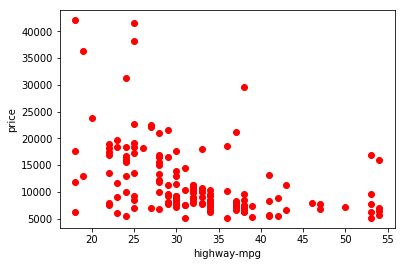

mean-effective-pressure	-0.10486005065048896


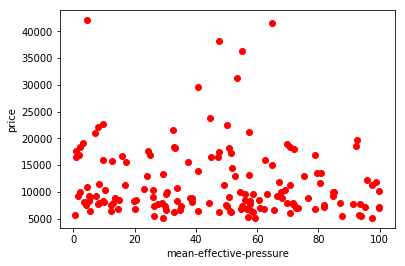

torque	0.1014345813072747


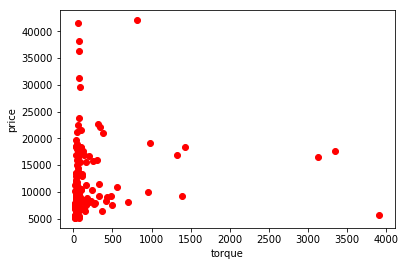

In [115]:
# (1) # Your Code goes here:

num = 0
y = auto_numeric["price"]
for i in auto_numeric.columns.values:
    if i not in ["price"]:
        x = auto_numeric[i]
       # data = np.array([x,y])
       # a = np.corrcoef(data)
       #print(a)
        r = stats.pearsonr(x,y)[0]
        print(i+'\t'+str(r))
        plt.xlabel(i)
        plt.ylabel("price")
        plt.plot(x,y,'ro')
        plt.show()



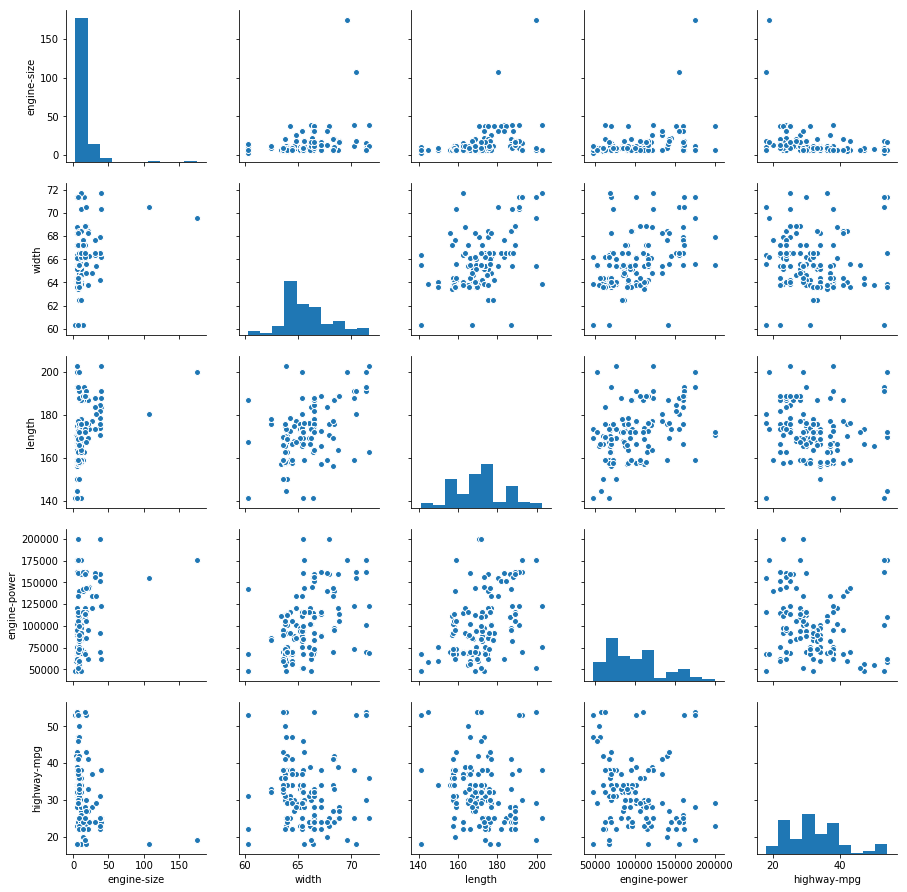

In [116]:
# (3) # Your Code goes here:
 
select = auto_numeric.loc[:,["engine-size","width","length","engine-power","highway-mpg"]]
sns.pairplot(select)


(4) ***Your answer goes here:***
Yes. The engine-size exhibit significant correlations between each other attribute(width,length,engine-power,highway-mpg).

(5) ***Your answer goes here:***
I will remove "highway-mpg", because it has the lowest absolute value of correlation coefficient and the pairplot doesn't show it has significant correlations between with other four attributes.

## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

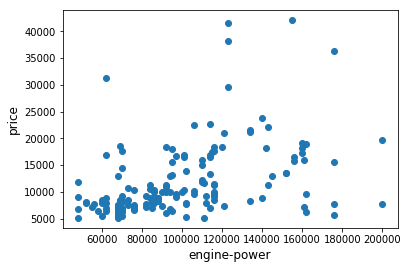

In [117]:
# (1) # Your Code goes here:
x = auto_numeric["engine-power"]
y = auto_numeric["price"]
plt.scatter(x,y)
plt.xlabel("engine-power",fontsize=12)
plt.ylabel("price",fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=10)

(2) ***Your answer goes here:***
It is not so good to use "engine-power" to predict the price. Because the scatter plot shows that the engine-power and price doesn't exist a obvious liner relationship.

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

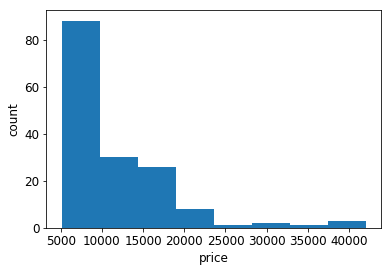

In [118]:
# (1) # Your Code goes here:
plt.hist(auto_numeric["price"],bins = 8)
plt.xlabel("price",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=12)


(2) ***Your answer goes here:***
 Because most of data are between 5000 and 25000.
 Remove the data which are greater than 25000 would improve its applicability.
 

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

In [119]:
# Your Code goes here:

X = np.array(auto_numeric["engine-power"]).reshape(-1, 1)
y = np.array(auto_numeric['price']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
print('Number of instances in X: {}'.format(np.shape(X)[0]))
print('Number of instances in X_train: {}'.format(X_train.shape[0]))
print('Number of instances in X_test: {}'.format(X_test.shape[0]))
print('Number of instances in X_train and X_test together: {}'.format(X_train.shape[0] + X_test.shape[0]))


Number of instances in X: 159
Number of instances in X_train: 127
Number of instances in X_test: 32
Number of instances in X_train and X_test together: 159


### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

In [120]:
# Your Code goes here:
baseline = 0
print("baseline of price is"+" "+ str(baseline))

baseline of price is 0


<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters: ***N.B.*** *Here we mean the weights of the Regression  Function*.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

In [121]:
# (1) # Your Code goes here:
lm = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lm.fit(X_train, y_train)
print(lm.coef_)

[[0.08988389]]


(2) ***Your answer goes here:***
  The result is the weight of the linear regression function.
  The weight of the regession function shows that there are not significant relationship between engine-power attribute and price, because the correlation coefficient is low. It means that it will have the influence on the price but not the large influence.

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points. Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

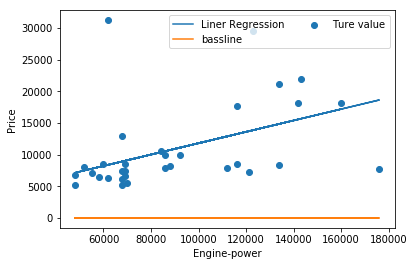

In [122]:
# (1) # Your Code goes here:
a = lm.coef_
b = lm.intercept_
z = a*X_test + b
baseline = np.zeros((32,1))

y_predict = lm.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test,y_predict)
plt.plot(X_test,baseline)
#plt.plot(X_test,z,color = "red")
label = ["Liner Regression","bassline","Ture value"]
plt.xlabel('Engine-power')
plt.ylabel('Price')
plt.legend(label, loc =0,ncol=2)
    

(2) ***Your answer goes here:***
 The Liner Regression model has better performance than the baseline model.
 Because the Liner Regression model fits the data more.
 We can compute the accuracy and the root mean squared error to evaluate the performance of these two models.

### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

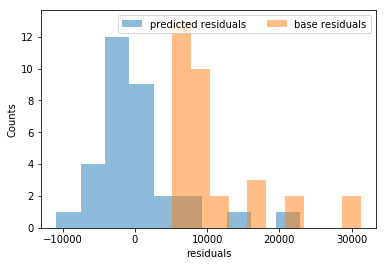

In [123]:
# (1) # Your Code goes here:
residuals = y_test - y_predict 
residuals = residuals.reshape(-1)


residuals_b = y_test -baseline
residuals_b = residuals_b.reshape(-1)


plt.hist(residuals,bins = 10,label="predicted residuals",alpha =0.5)
plt.hist(residuals_b,bins = 10,label="base residuals",alpha =0.5)
label = ["predicted residuals","base residuals"]
plt.ylabel('Counts')
plt.xlabel('residuals')
plt.legend(label, loc =0,ncol=2)
plt.show()



In [124]:
# (2) # Your Code goes here:
baseline = np.zeros((32,1))

print('Testing accuracy of the Linear Regression Model by using  the Coefficient of Determination: {:.3f}'.format(r2_score(y_test, lm.predict(X_test))))
print('Testing accuracy of the Linear Regression Model by using Root Mean Squared Error: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test)))))
print('Testing accuracy of the Baseline Model by using  the Coefficient of Determination {:.3f}'.format(r2_score(y_test, baseline)))
print('Testing accuracy of the Baseline Model by using Root Mean Squared Error: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, baseline))))

Testing accuracy of the Linear Regression Model by using  the Coefficient of Determination: 0.169
Testing accuracy of the Linear Regression Model by using Root Mean Squared Error: 6153.704
Testing accuracy of the Baseline Model by using  the Coefficient of Determination -2.664
Testing accuracy of the Baseline Model by using Root Mean Squared Error: 12918.642


(3) ***Your answer goes here:***
The coefficient of determination measures how well observed outcomes are replicated by the model. When coefficient of determination is closer to 1 ,it means this model performs well.On the contrary, if the coefficient of determiantion is closer to 0 ,it means this model really has a bad accuracy.
The root mean squared error measures accuracy of model.And  a lower RMSD is better than a higher one.
According to the coefficient of determiantion and the root mean squared error , the linear regression model is better than the baseline model
The plot and two values show that the liner regression model is better than the baseline model. The residuals of linear regression model always located aroun 0 ,which means that the predicted value is very close to the true value.And the resuals of the baseline model always located around 10000 means that the predicted value is larger than the true value.


<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



(1) ***Your answer goes here:***
I just choose 0 as baselinemodel.And it will never change when the value of attributes change.So it really a bad model for prediction.And the  accuracy and the root mean squared error demonstrate it.


In [125]:
# (2) # Your Code goes here:
X = np.array(auto_numeric["engine-power"]).reshape(-1, 1)
y = np.array(auto_numeric['price']).reshape(-1, 1)
kf = KFold(n_splits=5, shuffle=True,random_state=0)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [  0   1   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  20
  21  22  23  25  27  28  29  30  31  32  34  35  36  38  39  41  42  43
  46  47  48  49  50  51  52  53  55  57  58  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  84  87  88  89  91  92
  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112
 113 114 115 116 117 118 121 122 123 124 125 127 129 130 132 133 135 136
 137 138 139 140 141 143 145 146 147 149 150 151 152 153 154 155 156 157
 158] TEST: [  7   8  19  24  26  33  37  40  44  45  54  56  59  60  61  62  63  83
  85  86  90  95 110 119 120 126 128 131 134 142 144 148]
TRAIN: [  0   1   3   4   5   6   7   8   9  11  12  13  14  15  17  19  20  21
  23  24  25  26  28  29  31  32  33  34  35  36  37  38  39  40  41  42
  44  45  46  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  67  68  69  70  72  75  76  77  78  79  81  82  83  84  85
  86  87  88  90  91  92  94  95  98  99

In [126]:
# (3) # Your Code goes here:
X = X_train
y = y_train
lasso = linear_model.Lasso()
y_pred = cross_val_predict(lasso, X, y,cv = kf)
print('Testing accuracy of the new Liner Regression Model by using r2_score meric: {:.3f}'.format(r2_score(y, y_pred)))
print('Testing accuracy of the new Liner Regression Model by using Root Mean Squared Error: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y, y_pred))))

Testing accuracy of the new Liner Regression Model by using r2_score meric: 0.158
Testing accuracy of the new Liner Regression Model by using Root Mean Squared Error: 5878.244


(4) ***Your answer goes here:*** 
When use the cross valiadation prediction,it improves the performance of the linear regression model according to the coefficient of determination and root mean squared error.

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

In [127]:
# (1) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path, delimiter = ',')
Xn = np.array(auto_base["engine-power"]).reshape(-1, 1)
yn = np.array(auto_base['price']).reshape(-1, 1)

lm_new = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
y_pre = cross_val_predict(lm_new, Xn, yn)


print('Testing accuracy of the new Liner Regression Model by using r2_score meric: {:.3f}'.format(r2_score(yn, y_pre)))
print('Testing accuracy of the new Liner Regression Model by using Root Mean Squared Error: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(yn, y_pre))))


Testing accuracy of the new Liner Regression Model by using r2_score meric: -0.019
Testing accuracy of the new Liner Regression Model by using Root Mean Squared Error: 6786.316


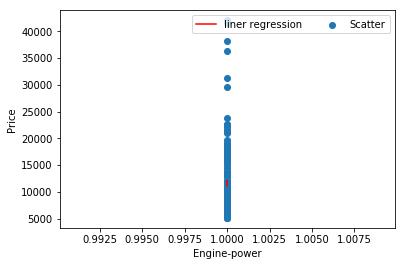

In [128]:
# (2) Show any working code here...
# Your Code goes here:
y_pre = cross_val_predict(lm_new, Xn, yn)


plt.scatter(Xn, yn)
plt.plot(Xn,y_pre,color='red')

label = ["liner regression","Scatter"]
plt.xlabel('Engine-power')
plt.ylabel('Price')
plt.legend(label, loc =0,ncol=2)


(2) - Final Conclusion(s)
***Your answer goes here:***
I noticed that Coefficient of Determination and the root mean squared error of this new linear regression become worse than the value of previous model.If all the attributes have the same value, it would be difficult to get the linear regression moel.Because the attribute and price don't have a clear relationship, which results in the worse value.

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

###### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

In [136]:
# (1) # Your Code goes here:

XM = np.array(auto_numeric.drop("price",axis=1))
yM = np.array(auto_numeric["price"])

lm_M = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
y_predM = cross_val_predict(lm_M, XM, yM)

print('Testing accuracy of the Multivariate Liner Regression Model by using r2_score meric: {:.3f}'.format(r2_score(yM, y_predM)))
print('Testing accuracy of the Multivariate Liner Regression Model by using Root Mean Squared Error: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(yM, y_predM))))

Testing accuracy of the Multivariate Liner Regression Model by using r2_score meric: 0.560
Testing accuracy of the Multivariate Liner Regression Model by using Root Mean Squared Error: 4461.239


(2) ***Your answer goes here:***
The multivariate linear regression model has better performance than the univariate linear regression model according to the coefficient and the root mean squared error.Because the price is not influenced by only one attributed and it is decided or influenced by many attributes.
 

### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` (plot below)
1. [Text] Why might this cause a problem for linear regression? 

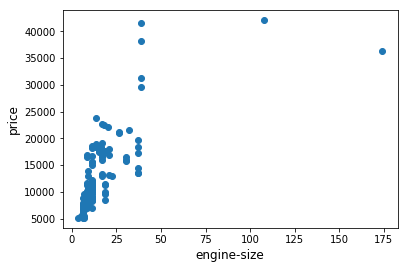

In [130]:
# (1) # Your Code goes here:
x = auto_numeric["engine-size"]
y = auto_numeric["price"]
plt.scatter(x,y)
plt.xlabel("engine-size",fontsize=12)
plt.ylabel("price",fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=10)


(2) ***Your answer goes here:***
  Because many data has the diffrerent value for price when they have the same value for engine-size. And it means that the price doesn't have a clear linear relationshop with the engine-size.

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a (Multi-variate) LinearRegression Model (on all the attributes including the transformed `engine-size`) and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

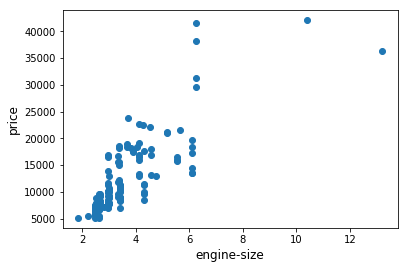

In [135]:
# (1) # Your Code goes here:
trans =np.sqrt(x)
plt.scatter(trans,y)
plt.xlabel("engine-size",fontsize=12)
plt.ylabel("price",fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=10)


In [134]:
# (2) # Your Code goes here:
temp = auto_numeric.drop("price",axis=1)
temp["engine-size"]= np.sqrt(temp["engine-size"])
XR = np.array(temp)
yR = np.array(auto_numeric["price"])

lm_R = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
y_predR = cross_val_predict(lm_R, XR, yR)
print('Testing accuracy of the Multivariate Liner Regression Model by using r2_score meric: {:.3f}'.format(r2_score(yR, y_predR)))
print('Testing accuracy of the Multivariate Liner Regression Model by using Root Mean Squared Error: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(yR, y_predR))))


Testing accuracy of the Multivariate Liner Regression Model by using r2_score meric: 0.621
Testing accuracy of the Multivariate Liner Regression Model by using Root Mean Squared Error: 4140.107


(3) ***Your answer goes here:***
The performance of the new linear regression model is better than the performance of previous linear regression model.The accuracy is higher and the root mean squared erros is smaller.

### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***
Because every attribute has different range  of value.If one attribute has a large value and another attribute has a small value,it will affect the weights of them. So we can normalize the data into (-1,1).And then we can judge which is the important attributes by ranking the weights of the liner regression.

In [137]:
# (2) # Your Code goes here:
auto_numeric["engine-size"] = temp["engine-size"]
for column in auto_numeric.columns: 
    mean = auto_numeric[column].mean()
    maxt = auto_numeric[column].max()
    mint = auto_numeric[column].min()
    if column not in ["price"]:
        auto_numeric[column] = (auto_numeric[column]-mean)/(maxt-mint)

X = auto_numeric.drop("price",axis=1)
y = auto_numeric["price"]
lm_1 = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lm_1.fit(X, y)
print(lm_1.coef_)


[-1236.44939915  1646.29418743   801.5618353   7279.3750485
  2372.49994814 37619.42289802  -917.52348929 -4142.62129303
  3286.07866629 -2361.58011085  3067.94879724  1433.14340952
 -7377.45669346 -1985.41896203  -510.23062986]


(3) ***Your answer goes here:***
the three most important features :"engine-size","height","highway-mpg"

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

(1) ***Your answer goes here:***
 

In [138]:
# (2) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_nonlinear.csv')
auto_nolinear = pd.read_csv(data_path, delimiter = ',')
P = auto_nolinear["price"]

x = auto_nolinear["length"]
y = auto_nolinear["engine-power"]

auto_nolinear["length"] = auto_nolinear["length"]*auto_nolinear["length"]
auto_nolinear["engine-power"] = auto_nolinear["engine-power"]*auto_nolinear["engine-power"]
'''
for column in auto_nolinear.columns:   
    if column not in ["length", "engine-power"]: 
        auto_nolinear = auto_nolinear.drop(column,axis=1) 
'''
lm_new = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lm_new.fit(auto_nolinear, P)
y_pre = lm_new.predict(auto_nolinear)
print('Testing accuracy of the Multivariate Liner Regression Model by using r2_score meric: {:.3f}'.format(r2_score(P, y_pre)))
print('Testing accuracy of the Multivariate Liner Regression Model by using Root Mean Squared Error: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(P, y_pre))))


Testing accuracy of the Multivariate Liner Regression Model by using r2_score meric: 1.000
Testing accuracy of the Multivariate Liner Regression Model by using Root Mean Squared Error: 0.000


(3) ***Your answer goes here:***
 The result shows that adding a second-order basis to the two attributes length and engine-power improve the performance of model a lot.It is nearly perfect.